# Supervised Machine-Learning Algorithm
A comparison study of various supervised machine-learning algorithms for breast cancer type detection based on Mueller and Guido's textbook of <bold>"Introduction to Python for Machine Learning: A Guide for Data Scientists"</bold>.

Algorithms discussed here:
1. K-Nearest Neighbor (KNN)
2. K-Nearest Regression (KNR)
3. Linear Regression (LR)
4. Ridge Regression (Ridge)
5. Ridge Classifier (RC)
6. Lasso*
7. Logistic Regression (LogReg)
8. Linear SVM Support Vector Classification (LinearSVC)
9. Naive Bayes Classifiers*
10. Decision Tree Classifier
11. Random Forest Classifier (RFC)
12. Gradient Boosted Regression Tree (GBRT)
13. Kernelized Support Vector Machine (SVM)*

<em>*: yet to be added to this notebook</em> 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Dataset used: Breast Cancer dataset from Scikit-Learn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))
print("Dataset shape: \n{}".format(cancer.data.shape))
print("Features: \n{}".format(cancer.feature_names))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Dataset shape: 
(569, 30)
Features: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
models = []
accuracy_mean = []
accuracy_median = []

# k-Nearest Neighbors
Simplest machine learning algorithm. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset.

In [5]:
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerdf["target"] = cancer.target

In [6]:
cancerdf.head()
cancerdf.describe()
# cancerdf[cancerdf['target'] == 1].count

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
# Create DataFrames for correlation values between features
cancercorrdf = pd.DataFrame(cancerdf.corr())
print(cancercorrdf)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

In [8]:
# Correlation heatmap between features and target in malignant cancer
cancercorrpositivedf = cancercorrdf[cancercorrdf['target'] >= 0]['target'].sort_values(ascending=False)
cancercorrnegativedf = cancercorrdf[cancercorrdf['target'] < 0]['target'].sort_values()
print(cancercorrpositivedf)
print(cancercorrnegativedf)

target                    1.000000
smoothness error          0.067016
mean fractal dimension    0.012838
texture error             0.008303
symmetry error            0.006522
Name: target, dtype: float64
worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
wors

<Axes: >

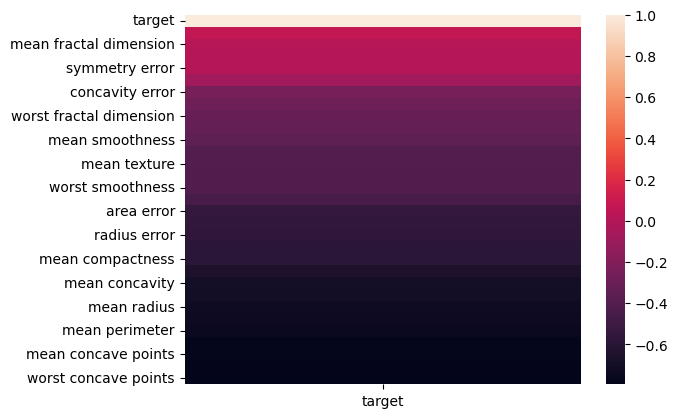

In [9]:
sns.heatmap(cancercorrdf[['target']].sort_values(by='target', ascending=False))

In [10]:
# Split into train and test data
from sklearn.model_selection import train_test_split

# The X and y are using 'cancer' directly, not the dataframe
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

In [11]:
# Import and instantiate classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

# Train model|
knn.fit(X_train, y_train)

# Show test set prediction
print("Test set prediction: {}\n".format(knn.predict(X_test)))

# Show actual score
print("Test set accuracy: {}".format(knn.score(X_test, y_test)))

Test set prediction: [1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1]

Test set accuracy: 0.9440559440559441


In [12]:
# Trying different n neighbors

knn_training_accuracy = []
knn_test_accuracy = []
neighbors = range(1,20)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    knn_training_accuracy.append(knn.score(X_train, y_train))
    knn_test_accuracy.append(knn.score(X_test, y_test))

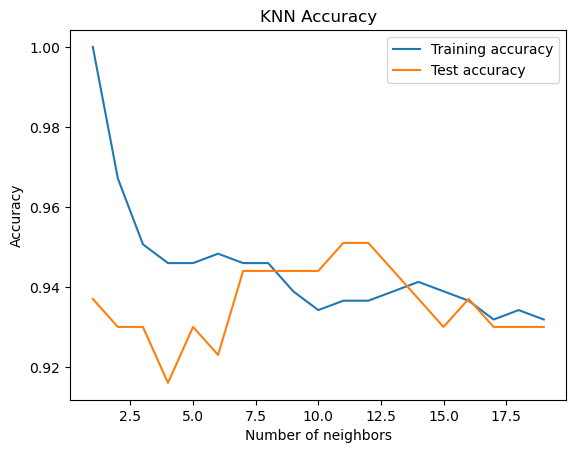

In [13]:
# Accuracy analysis

plt.title("KNN Accuracy")
plt.plot(neighbors, knn_training_accuracy, label="Training accuracy")
plt.plot(neighbors, knn_test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
plt.show()

In [14]:
models.append("KNN")
accuracy_mean.append(np.array(knn_test_accuracy).mean())
accuracy_median.append(np.median(np.array(knn_test_accuracy)))

print(models, accuracy_mean, accuracy_median)

['KNN'] [0.9359587780640413] [0.9370629370629371]


# k-Neighbors Regression
A regression variant of the KNN algorithm.

In [15]:
# Import and instantiate classifier
from sklearn.neighbors import KNeighborsRegressor

# Test for various values of n
knr_training_accuracy = []
knr_test_accuracy = []

for n_neighbors in neighbors:
    knr = KNeighborsRegressor(n_neighbors=n_neighbors)
    knr.fit(X_train, y_train)
    knr_training_accuracy.append(knr.score(X_train, y_train))
    knr_test_accuracy.append(knr.score(X_test, y_test))

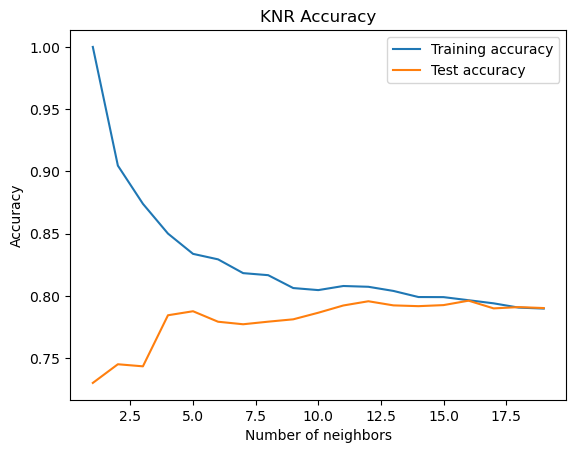

In [16]:
# Accuracy analysis

plt.title("KNR Accuracy")
plt.plot(neighbors, knr_training_accuracy, label="Training accuracy")
plt.plot(neighbors, knr_test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
plt.show()

In [17]:
models.append("KNR")
accuracy_mean.append(np.array(knr_test_accuracy).mean())
accuracy_median.append(np.median(np.array(knr_test_accuracy)))
print(models, accuracy_mean, accuracy_median)

['KNN', 'KNR'] [0.9359587780640413, 0.7804067668071526] [0.9370629370629371, 0.787748427672956]


# K-Neighbors Pros and Cons

## Pros
- Easy to understand, gives reasonable performance without a lot of adjustments.
- Good baseline method to try before considering more advanced techniques.

## Cons
- Slow prediction for large features
- Perform poorly on sparse matrix, e.g. when binary values are used and many records has 0s.

# Linear Models
Discussed here: Linear Regression, Ridge regression, Lasso

## Linear Models for Classification
Logistic regression (not a regression), Linear SVM-Support Vector Classification (LinearSVC)

### Linear Regression (Least-square)

In [18]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression().fit(X_train, y_train)

# Coefficients and intercept
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 2.52390857e-01 -8.27017047e-03 -3.84846472e-02  1.07706438e-04
 -2.11714344e+00  6.04602710e+00 -1.37572098e+00 -8.19984841e-01
 -5.00538522e-01 -7.73066061e+00 -6.53467433e-01 -2.37476925e-02
  6.19050809e-02 -1.59167418e-04 -1.87181366e+01 -1.74242482e+00
  4.00123010e+00 -1.09518840e+01  1.64532103e+00  1.26611650e+01
 -1.69732559e-01 -4.07692784e-03  1.67145963e-03  9.45166626e-04
  2.23975468e-01 -2.39751842e-01 -4.13930800e-01 -1.11264171e+00
 -7.67002817e-01 -2.84851663e+00]
lr.intercept_: 3.8053150694454763


In [19]:
# Model evalutation
print("Training set score: {:2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:2f}".format(lr.score(X_test, y_test)))

models.append("LR")
accuracy_mean.append(lr.score(X_test, y_test))
accuracy_median.append(lr.score(X_test, y_test))


Training set score: 0.783783
Test set score: 0.725488


In [20]:
print(models, accuracy_mean, accuracy_median)

['KNN', 'KNR', 'LR'] [0.9359587780640413, 0.7804067668071526, 0.7254879746912725] [0.9370629370629371, 0.787748427672956, 0.7254879746912725]


### Ridge regression 

The same as linear regression, but the coefficients are chosen not only so that they predict well on the training data, but also fit an additional constraint.
- The magnitude of coefficients need to be as small as possible while still predicting well.
- <b>L2 regularization</b>: explicitly restricting a model to avoid overfitting. 

In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.747326
Test set score: 0.732843


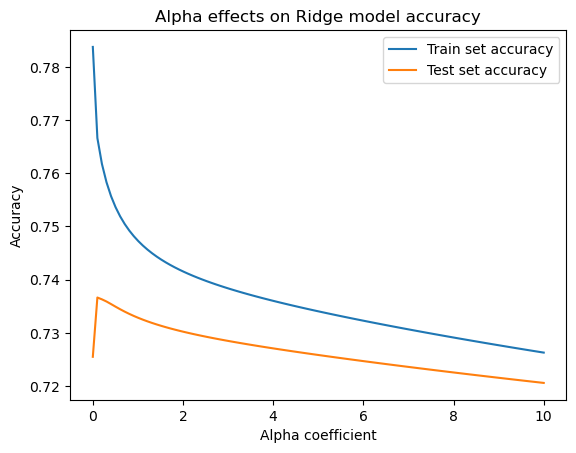

Average accuracy: 0.7264446591077004
Median accuracy: 0.7257081895158773


In [22]:
# Testing with multiple alpha-coefficients
alpha_range = np.linspace(0, 10, 100)
ridge_alpha_test = []
ridge_alpha_train = []

for alpha in alpha_range:
    ridge_alpha = Ridge(alpha=alpha).fit(X_train, y_train)
    ridge_alpha_train.append(ridge_alpha.score(X_train, y_train))
    ridge_alpha_test.append(ridge_alpha.score(X_test, y_test))

plt.title("Alpha effects on Ridge model accuracy")
plt.plot(alpha_range, ridge_alpha_train, label="Train set accuracy")
plt.plot(alpha_range, ridge_alpha_test, label="Test set accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha coefficient")
plt.legend()
plt.show()

print("Average accuracy: {}".format(np.mean(np.array(ridge_alpha_test))))
print("Median accuracy: {}".format(np.median(np.array(ridge_alpha_test))))

### RidgeClassifier (RC)

Ridge regression that also uses regularization, enhanced for classification.

In [23]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier().fit(X_train, y_train)
print("Training set score: {}".format(rc.score(X_train, y_train)))
print("Test set score: {}".format(rc.score(X_test, y_test)))

Training set score: 0.9647887323943662
Test set score: 0.951048951048951


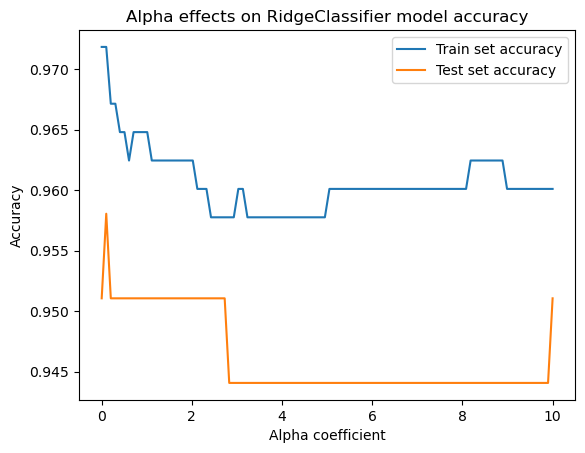

Average test accuracy: 0.946153846153846
Median test accuracy: 0.9440559440559441


In [24]:
# How alpha coefficient works?
rc_alpha_test = []
rc_alpha_train = []

for alpha in alpha_range:
    rc_alpha = RidgeClassifier(alpha=alpha).fit(X_train, y_train)
    rc_alpha_train.append(rc_alpha.score(X_train, y_train))
    rc_alpha_test.append(rc_alpha.score(X_test, y_test))

plt.title("Alpha effects on RidgeClassifier model accuracy")
plt.plot(alpha_range, rc_alpha_train, label="Train set accuracy")
plt.plot(alpha_range, rc_alpha_test, label="Test set accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Alpha coefficient")
plt.legend()
plt.show()

print("Average test accuracy: {}".format(np.mean(np.array(rc_alpha_test))))
print("Median test accuracy: {}".format(np.median(np.array(rc_alpha_test))))


### Correlation between Alpha coefficient with Rigde and RidgeClassifier Model Accuracy
The bigger the alpha coefficient is, the lower the accuracy of the model. The optimum setting of Alpha coefficient depends on the particular dataset. Shifting the alpha coefficient toward zero might help with the generalization.

In [25]:
models.append("Ridge")
accuracy_mean.append(np.mean(np.array(ridge_alpha_test)))
accuracy_median.append(np.median(np.array(ridge_alpha_test)))

models.append("RC")
accuracy_mean.append(np.mean(np.array(rc_alpha_test)))
accuracy_median.append(np.median(np.array(rc_alpha_test)))

print(models)
print(accuracy_mean)
print(accuracy_median)

['KNN', 'KNR', 'LR', 'Ridge', 'RC']
[0.9359587780640413, 0.7804067668071526, 0.7254879746912725, 0.7264446591077004, 0.946153846153846]
[0.9370629370629371, 0.787748427672956, 0.7254879746912725, 0.7257081895158773, 0.9440559440559441]


### Lasso

An alternative to Ridge for requlizing linear regression, restricting coefficients to be close to zero using L1 regularization. 

- <bold>L1 regularization</bold>: Some coefficients are exactly zero--an automatic feature selection.

In [26]:
# I will do Lasso, but first let's go to Linear SVC and Logistic Regression

### LogisticRegression (LogReg) and Linear SVM Support Vector Classification (LinearSVC)

For LogisticRegression (LR) and LinearSVC, the trade-off parameter that determines the strength of the regularization is called C.
- Higher value of C correspond to less regularization--fitting the training set as best as possible.
- Lower value of C correspond to more regularization--more emphasis on finding a coefficient vector that is close to zero.

### LogisticRegression (LogReg)

In [27]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {}".format(logreg.score(X_train, y_train)))
print("Test set score: {}".format(logreg.score(X_test, y_test)))

Training set score: 0.9483568075117371
Test set score: 0.958041958041958


c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

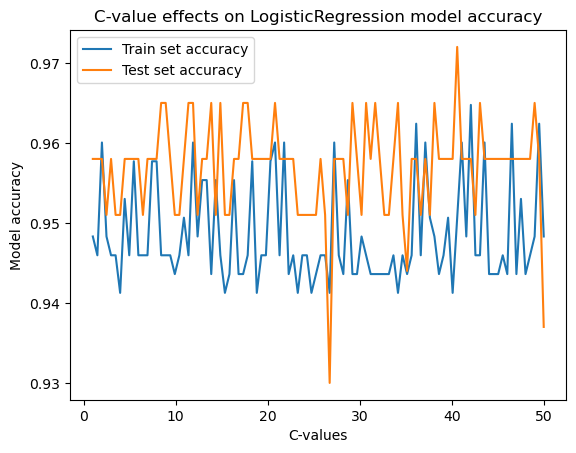

Average test accuracy: 0.9569930069930069
Median test accuracy: 0.958041958041958


In [28]:
# Experimenting with range of C values for LogisticRegression

c_range = np.linspace(1, 50, 100)
logreg_c_train = []
logreg_c_test = []

for c in c_range:
    logreg_c = LogisticRegression(C=c).fit(X_train, y_train)
    logreg_c_train.append(logreg_c.score(X_train, y_train))
    logreg_c_test.append(logreg_c.score(X_test, y_test))

plt.title("C-value effects on LogisticRegression model accuracy")
plt.plot(c_range, logreg_c_train, label="Train set accuracy")
plt.plot(c_range, logreg_c_test, label="Test set accuracy")
plt.xlabel("C-values")
plt.ylabel("Model accuracy")
plt.legend()
plt.show()

print("Average test accuracy: {}".format(np.mean(np.array(logreg_c_test))))
print("Median test accuracy: {}".format(np.median(np.array(logreg_c_test))))
    

In [29]:
models.append("LogReg")
accuracy_mean.append(np.mean(np.array(logreg_c_test)))
accuracy_median.append(np.median(np.array(logreg_c_test)))

print(models)
print(accuracy_mean)
print(accuracy_median)

['KNN', 'KNR', 'LR', 'Ridge', 'RC', 'LogReg']
[0.9359587780640413, 0.7804067668071526, 0.7254879746912725, 0.7264446591077004, 0.946153846153846, 0.9569930069930069]
[0.9370629370629371, 0.787748427672956, 0.7254879746912725, 0.7257081895158773, 0.9440559440559441, 0.958041958041958]


### Linear SVM Support Vector Classification (LinearSVC)

In [30]:
from sklearn.svm import LinearSVC
linearsvc = LinearSVC().fit(X_train, y_train)

c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
print("Coefficient shape: ", linearsvc.coef_.shape)
print("Intercept shape: ", linearsvc.intercept_.shape)

Coefficient shape:  (1, 30)
Intercept shape:  (1,)


c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\RAYHAN EGAR\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The defaul

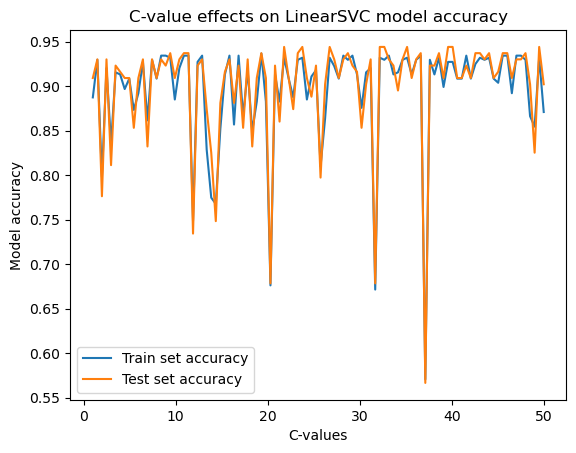

Average test accuracy: 0.8996503496503497
Median test accuracy: 0.9230769230769231


In [32]:
# Experimenting with different C-values for LinearSVC

linearsvc_c_train = []
linearsvc_c_test = []

for c in c_range:
    linearsvc_c = LinearSVC(C=c).fit(X_train, y_train)
    linearsvc_c_train.append(linearsvc_c.score(X_train, y_train))
    linearsvc_c_test.append(linearsvc_c.score(X_test, y_test))

plt.title("C-value effects on LinearSVC model accuracy")
plt.plot(c_range, linearsvc_c_train, label="Train set accuracy")
plt.plot(c_range, linearsvc_c_test, label="Test set accuracy")
plt.xlabel("C-values")
plt.ylabel("Model accuracy")
plt.legend()
plt.show()

print("Average test accuracy: {}".format(np.mean(np.array(linearsvc_c_test))))
print("Median test accuracy: {}".format(np.median(np.array(linearsvc_c_test))))

In [33]:
models.append("LinearSVC")
accuracy_mean.append(np.mean(np.array(linearsvc_c_test)))
accuracy_median.append(np.median(np.array(linearsvc_c_test)))

print(models)
print(accuracy_mean)
print(accuracy_median)

['KNN', 'KNR', 'LR', 'Ridge', 'RC', 'LogReg', 'LinearSVC']
[0.9359587780640413, 0.7804067668071526, 0.7254879746912725, 0.7264446591077004, 0.946153846153846, 0.9569930069930069, 0.8996503496503497]
[0.9370629370629371, 0.787748427672956, 0.7254879746912725, 0.7257081895158773, 0.9440559440559441, 0.958041958041958, 0.9230769230769231]


# Naive Bayes Classifiers

Tend to be faster in training compared to linear models, but the generalization provided is slightly worse.

<bold>Efficient</bold>: learn parameters by looking at each feature individually and collect simple per-class statistics from each feature.

- GaussianNB: can be applied to any continuous data, mostly used on very high-dimensional data.
- BernoulliNB: assumes binary data
- MultinomialNB: assumes count data.

BernoulliNB and MultinomialNB are mostly used in text data classification for sparse count data. MultinomialNB usually performs better than BinaryMB.

Parameter: alpha--controls model complexity.
- A large alpha means more smoothing, resulting in less complex mdodels.

# Decision Trees

Widely used for both classification and regression by learning a hierarchy of if-else questions, leading to a decision.

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
print("Accuracy on training set: {}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.9370629370629371


### Max-Depth on Decision Tree

Building an ideal tree and continuing until all leaves are <em>pure</em> leads to models that are very complex and highly overfit to the training data.

There are two common strategies to prevent overfitting:
1. <em>pre-pruning</em>: stopping the creation of the tree early by specifying max-depth of a tree.
2. <em>post-pruning</em>: building the complete tree, then removing nodes that contain little information.

scikit-learn uses pre-prunning, hence why the main parameter for DecisionTreeClassifier and DecisionTreeRegressor is max_depth.

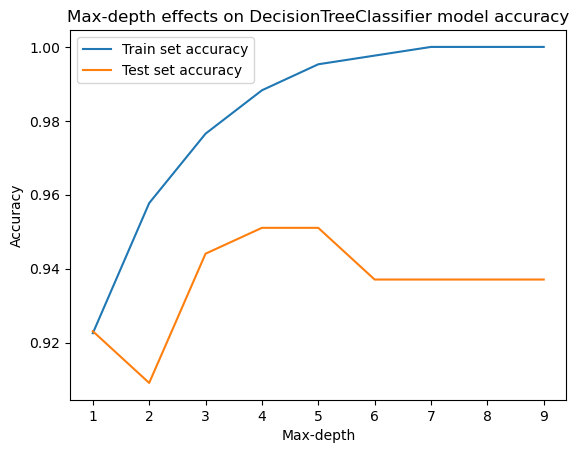

Average test accuracy: 0.9362859362859363
Median test accuracy: 0.9370629370629371


In [36]:
# Experimenting with different max_depth
depth_range = range(1, 10)
tree_train = []
tree_test = []

for max_depth in depth_range:
    tree_depth = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    tree_depth.fit(X_train, y_train)
    tree_train.append(tree_depth.score(X_train, y_train))
    tree_test.append(tree_depth.score(X_test, y_test))

plt.title("Max-depth effects on DecisionTreeClassifier model accuracy")
plt.plot(depth_range, tree_train, label="Train set accuracy")
plt.plot(depth_range, tree_test, label="Test set accuracy")
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("Average test accuracy: {}".format(np.mean(np.array(tree_test))))
print("Median test accuracy: {}".format(np.median(np.array(tree_test))))

In [37]:
models.append("DecisionTreeClassifier")
accuracy_mean.append(np.mean(np.array(tree_test)))
accuracy_median.append(np.median(np.array(tree_test)))

print(models)
print(accuracy_mean)
print(accuracy_median)

['KNN', 'KNR', 'LR', 'Ridge', 'RC', 'LogReg', 'LinearSVC', 'DecisionTreeClassifier']
[0.9359587780640413, 0.7804067668071526, 0.7254879746912725, 0.7264446591077004, 0.946153846153846, 0.9569930069930069, 0.8996503496503497, 0.9362859362859363]
[0.9370629370629371, 0.787748427672956, 0.7254879746912725, 0.7257081895158773, 0.9440559440559441, 0.958041958041958, 0.9230769230769231, 0.9370629370629371]


### Decision Trees Pros and Cons

Pros:
1. Can be easily visualized and understood by non-experts.
2. Algorithms are completely invariant to scaling of the data.
3. Each feature is processed separately, thus no preprocessing like normalization or standardization of features is needed for decision tree algorithm.

Cons:
They tend to overfit and provide poor generalization performance. The workaround is using ensemble methods.

# Ensembles of Decision Trees

Ensembles are methods that combine multiple ML models to create more poweful models. Two models discussed here: random forests and gradient boosted decision trees.

## Random Forests

A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. Each tree might do a relatively good job of predicting but still tend to overfit. 

By averaging multiple trees that work well on the given dataset, overfitting can be reduced while still retaining the predictive power of the trees.

The trees generated are randomized using two strategies:
1. Selecting different data pointsused to build a tree, and
2. Selecting different features for each split.

Three types: RandomForestRegressor (RFR), RandomForestClassifier (RFC)

### Parameters
1. n_estimators: number of trees to be build.
2. max_features: number of features selected to build the trees. If it sets to the number of actual features, no randomness of feature selection is injected. If it sets to 1, each tree may get deep.

Here, the number of max_features will be set to default and we will focus on the effect of varying n_estimator value.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

print("Accuracy on training set: {}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.958041958041958


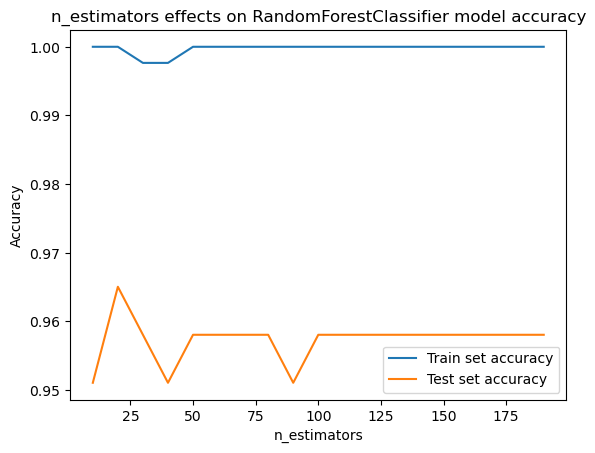

Average test accuracy: 0.9573058520426938
Median test accuracy: 0.958041958041958


In [47]:
# Experimenting with different n_estimators

n_estimators_range = np.arange(10, 200, 10, dtype=int)
rfc_test = []
rfc_train = []

for n_estimators in n_estimators_range:
    rfc_n = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    rfc_n.fit(X_train, y_train)
    rfc_train.append(rfc_n.score(X_train, y_train))
    rfc_test.append(rfc_n.score(X_test, y_test))

plt.title("n_estimators effects on RandomForestClassifier model accuracy")
plt.plot(n_estimators_range, rfc_train, label="Train set accuracy")
plt.plot(n_estimators_range, rfc_test, label="Test set accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("Average test accuracy: {}".format(np.mean(np.array(rfc_test))))
print("Median test accuracy: {}".format(np.median(np.array(rfc_test))))

In [48]:
models.append("RFC")
accuracy_mean.append(np.mean(np.array(rfc_test)))
accuracy_median.append(np.median(np.array(rfc_test)))

print(models)
print(accuracy_mean)
print(accuracy_median)

['KNN', 'KNR', 'LR', 'Ridge', 'RC', 'LogReg', 'LinearSVC', 'DecisionTreeClassifier', 'RFC']
[0.9359587780640413, 0.7804067668071526, 0.7254879746912725, 0.7264446591077004, 0.946153846153846, 0.9569930069930069, 0.8996503496503497, 0.9362859362859363, 0.9573058520426938]
[0.9370629370629371, 0.787748427672956, 0.7254879746912725, 0.7257081895158773, 0.9440559440559441, 0.958041958041958, 0.9230769230769231, 0.9370629370629371, 0.958041958041958]


## Gradient Boosted Regression Trees (GBRT)

This model can be used for regression and classification. It differs with RFC/RFR where GBRT works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.

- No randomization in gradient boosted regression trees, but strong pre-pruning is used.
- GBRT use very shallow trees (1-5 in depth), making it smaller.
- GBRT combines many simple models, iteratively improving performance.

Apart from max_depth and n_estimators, another important parameter is learning_rate. 
- learning_rate controls how strongly each tree tries to correct the mistakes of the previous trees.
- By default: n_estimators=100, max_depth=3, learning_rate=0.1

As Mueller et al stated: "Lowering max_depth provided a significant improvement of the model, while lowering the learning rate only increased the generalization performance slightly. Both techniques are used to reduce overfitting."

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.958041958041958


In [56]:
gbrt_depth_opt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt_depth_opt.fit(X_train, y_train)
print("Accuracy on training set: {}".format(gbrt_depth_opt.score(X_train, y_train)))
print("Accuracy on test set: {}".format(gbrt_depth_opt.score(X_test, y_test)))

gbrt_learn_opt = GradientBoostingClassifier(random_state=0, learning_rate=.01)
gbrt_learn_opt.fit(X_train, y_train)
print("Accuracy on training set: {}".format(gbrt_learn_opt.score(X_train, y_train)))
print("Accuracy on test set: {}".format(gbrt_learn_opt.score(X_test, y_test)))

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.958041958041958
Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.9370629370629371


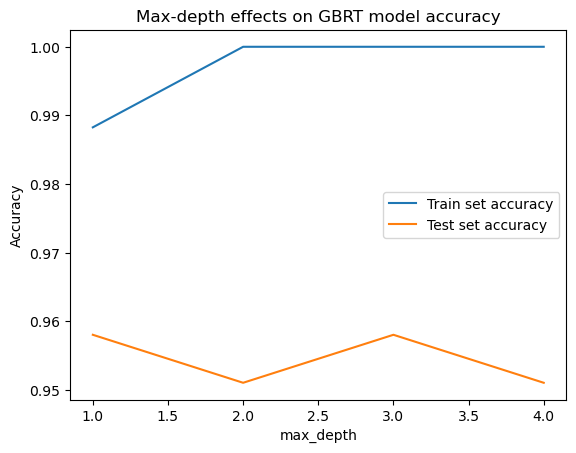

Average test accuracy: 0.9545454545454546
Median test accuracy: 0.9545454545454546


In [62]:
# Experimenting with different max-depth 
max_depth_range = range(1, 5)
gbrt_depth_train = []
gbrt_depth_test = []

for max_depth in max_depth_range:
    gbrt_depth = GradientBoostingClassifier(max_depth=max_depth, random_state=0)
    gbrt_depth.fit(X_train, y_train)
    gbrt_depth_train.append(gbrt_depth.score(X_train, y_train))
    gbrt_depth_test.append(gbrt_depth.score(X_test, y_test))

plt.title("Max-depth effects on GBRT model accuracy")
plt.plot(max_depth_range, gbrt_depth_train, label="Train set accuracy")
plt.plot(max_depth_range, gbrt_depth_test, label="Test set accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("Average test accuracy: {}".format(np.mean(np.array(gbrt_depth_test))))
print("Median test accuracy: {}".format(np.median(np.array(gbrt_depth_test))))

In [58]:
models.append("GBRT")
accuracy_mean.append(np.mean(np.array(gbrt_depth_test)))
accuracy_median.append(np.median(np.array(gbrt_depth_test)))

print(models)
print(accuracy_mean)
print(accuracy_median)

['KNN', 'KNR', 'LR', 'Ridge', 'RC', 'LogReg', 'LinearSVC', 'DecisionTreeClassifier', 'RFC', 'GBRT']
[0.9359587780640413, 0.7804067668071526, 0.7254879746912725, 0.7264446591077004, 0.946153846153846, 0.9569930069930069, 0.8996503496503497, 0.9362859362859363, 0.9573058520426938, 0.9545454545454546]
[0.9370629370629371, 0.787748427672956, 0.7254879746912725, 0.7257081895158773, 0.9440559440559441, 0.958041958041958, 0.9230769230769231, 0.9370629370629371, 0.958041958041958, 0.9545454545454546]


### GBRT Pros and Cons
GBRT are among the most powerful and widely used model for supervised learning. The main cons being the requirement for careful tuning of the parameters and training.

The main parameters of GBRT are n_estimators and learning_rate. With lower learning_rate, n_estimators needs to be larger to achieve the same model complexity.

# DecisionTree, RFC, and GBRT Features Importance

Evaluating the importances of each feature of the dataset using code provided in the textbook.

In [70]:
def plot_feature_importances(dataset, model, title):
    n_features = dataset.data.shape[1]

    plt.title(title)
    
    # Creating a horizontal bar plot
    plt.barh(range(n_features), model.feature_importances_, align='center')

    # Creating ticks in the y-axis
    plt.yticks(np.arange(n_features), dataset.feature_names)

    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

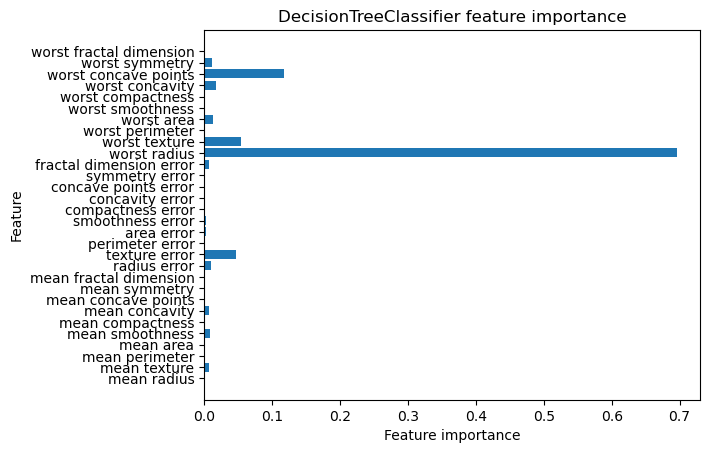

In [75]:
plot_feature_importances(cancer, tree, "DecisionTreeClassifier feature importance")

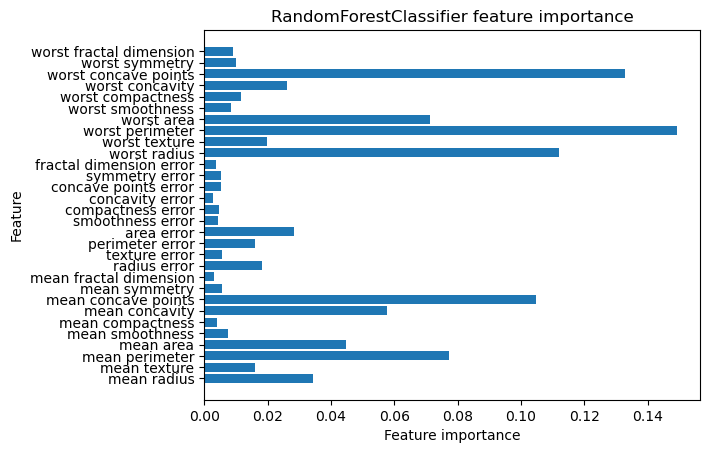

In [76]:
plot_feature_importances(cancer, rfc, "RandomForestClassifier feature importance")

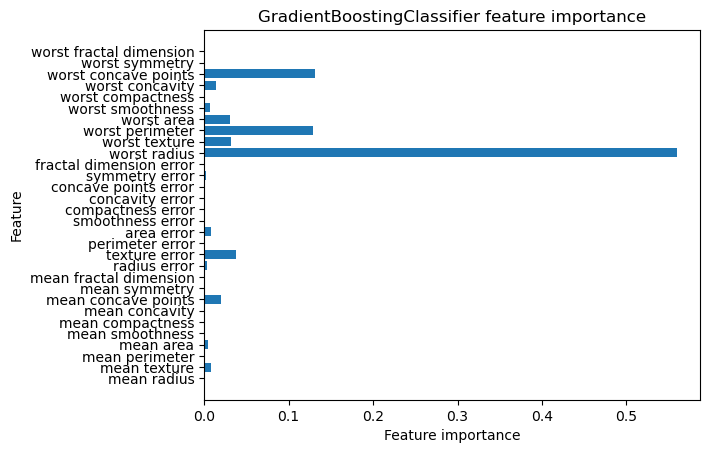

In [77]:
plot_feature_importances(cancer, gbrt, "GradientBoostingClassifier feature importance")

# Kernelized Support Vector Machines (SVM)

This is an extension for LinearSVC to allows for more complex models that are not defined simply by hyperplanes in the input space. 

I'll probably get through this kernelized SVM later though.

# Comparison of model median and mean accuracy

In [78]:
accuracy_dict = {
    "Model" : models,
    "Mean accuracy" : accuracy_mean,
    "Median accuracy" : accuracy_median 
}

accuracydf = pd.DataFrame(accuracy_dict)

In [79]:
print(accuracydf)

                    Model  Mean accuracy  Median accuracy
0                     KNN       0.935959         0.937063
1                     KNR       0.780407         0.787748
2                      LR       0.725488         0.725488
3                   Ridge       0.726445         0.725708
4                      RC       0.946154         0.944056
5                  LogReg       0.956993         0.958042
6               LinearSVC       0.899650         0.923077
7  DecisionTreeClassifier       0.936286         0.937063
8                     RFC       0.957306         0.958042
9                    GBRT       0.954545         0.954545


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


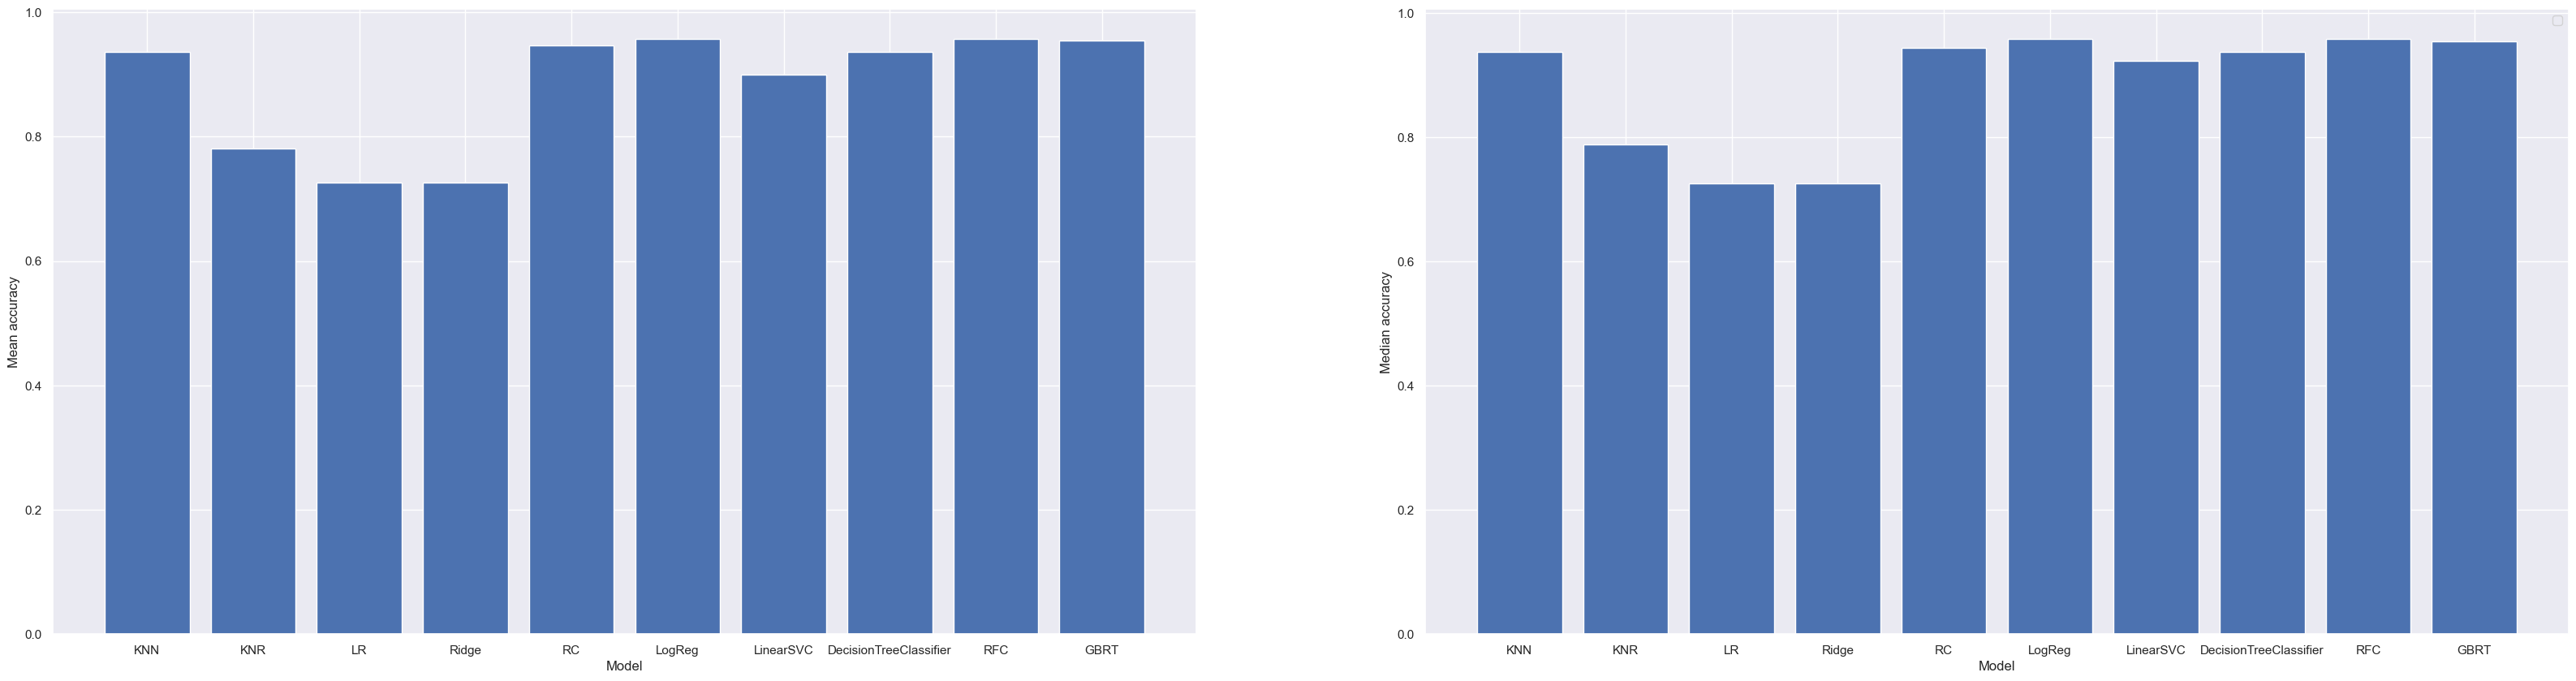

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,10))
ax1.bar(accuracydf["Model"], accuracydf["Mean accuracy"])
ax1.set_xlabel("Model")
ax1.set_ylabel("Mean accuracy")

ax2.bar(accuracydf["Model"], accuracydf["Median accuracy"])
ax2.set_xlabel("Model")
ax2.set_ylabel("Median accuracy")

plt.legend()
plt.show()